## **Bitcoin price predection using Machine learning **

In [ ]:
# Data manupliation librarires 
import pandas as pd
import numpy as np 
# data visulazation librarires 
import matplotlib.pylab as plt 
import seaborn as sns 

In [ ]:
data = pd.read_csv('/content/BTC-USD.csv') # importing the data set 

**Initial Data Exploration**

In [ ]:
data.shape # shape of the data

(2713, 7)

In [ ]:
data.dtypes # data types of the data 

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume       float64
dtype: object

In [ ]:
data.head(7) # displaying the 1st sefen rows in the data set 

,Date,Open,High,Low,Close,Adj Close,Volume
0,17/09/2014,465.864014,468.174011,452.421997,457.334015,457.334015,21056800.0
1,18/09/2014,456.859985,456.859985,413.104004,424.440002,424.440002,34483200.0
2,19/09/2014,424.102997,427.834991,384.532013,394.795990,394.795990,37919700.0
3,20/09/2014,394.673004,423.295990,389.882996,408.903992,408.903992,36863600.0
4,21/09/2014,408.084991,412.425995,393.181000,398.821014,398.821014,26580100.0
5,22/09/2014,399.100006,406.915985,397.130005,402.152008,402.152008,24127600.0
6,23/09/2014,402.092010,441.557007,396.196991,435.790985,435.790985,45099500.0


In [ ]:
data.tail(7) # displaying the last 7 rows in the data set 

,Date,Open,High,Low,Close,Adj Close,Volume
2706,13/02/2022,42236.56641,42693.05469,41950.94141,42197.51563,42197.51563,1.474159e+10
2707,14/02/2022,42157.39844,42775.77734,41681.95703,42586.91797,42586.91797,2.082778e+10
2708,15/02/2022,42586.46484,44667.21875,42491.03516,44575.20313,44575.20313,2.272166e+10
2709,16/02/2022,44578.27734,44578.27734,43456.69141,43961.85938,43961.85938,1.979255e+10
2710,17/02/2022,43937.07031,44132.97266,40249.37109,40538.01172,40538.01172,2.624666e+10
2711,18/02/2022,40552.13281,40929.15234,39637.61719,40030.97656,40030.97656,2.331001e+10
2712,19/02/2022,40022.13281,40246.02734,40010.86719,40126.42969,40126.42969,2.226390e+10


In [ ]:
data.isnull().sum() # to check the data set if has any null values 

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [ ]:
data.describe().round(2) # Data Exploration 

,Open,High,Low,Close,Adj Close,Volume
count,2713.00,2713.00,2713.00,2713.00,2713.00,2.713000e+03
mean,11311.04,11614.29,10975.56,11323.91,11323.91,1.470462e+10
std,16106.43,16537.39,15608.57,16110.37,16110.37,2.001627e+10
min,176.90,211.73,171.51,178.10,178.10,5.914570e+06
25%,606.40,609.26,604.11,606.72,606.72,7.991080e+07
50%,6301.57,6434.62,6214.22,6317.61,6317.61,5.098183e+09
75%,10452.40,10762.64,10202.39,10462.26,10462.26,2.456992e+10
max,67549.73,68789.62,66382.06,67566.83,67566.83,3.509680e+11


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fe8b7120150>,
      dtype=object)

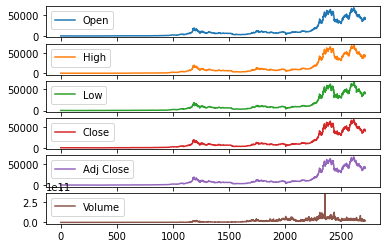

In [ ]:
data.plot(subplots = True) # Overview of all the columns

In [ ]:
open_series = data['Open']
high_series = data['High']
low_series = data['Low']
close_series = data['Close']
adj_series = data['Adj Close']
volume_series = data['Volume']

In [ ]:
open_series.head()
high_series.head()
low_series.head()
close_series.head()
adj_series.head()
volume_series.head()

0    21056800.0
1    34483200.0
2    37919700.0
3    36863600.0
4    26580100.0
Name: Volume, dtype: float64

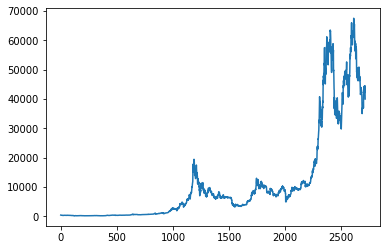

In [ ]:
plt.plot(open_series)

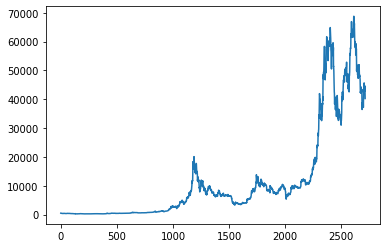

In [ ]:
plt.plot(high_series)

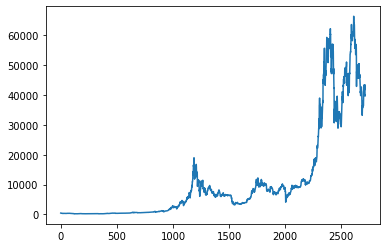

In [ ]:
plt.plot(low_series)

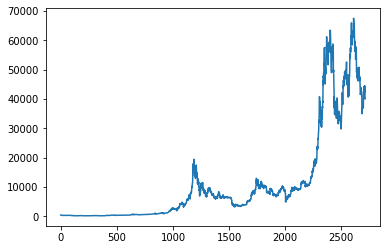

In [ ]:
plt.plot(close_series)

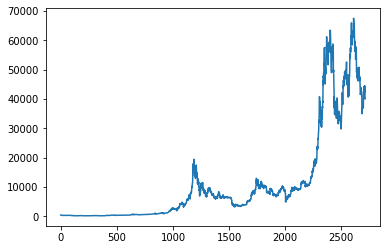

In [ ]:
plt.plot(adj_series)

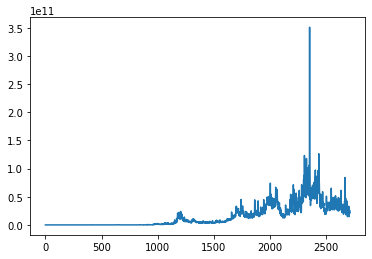

In [ ]:
plt.plot(volume_series)

# **LSTM Model **

**Close Price **

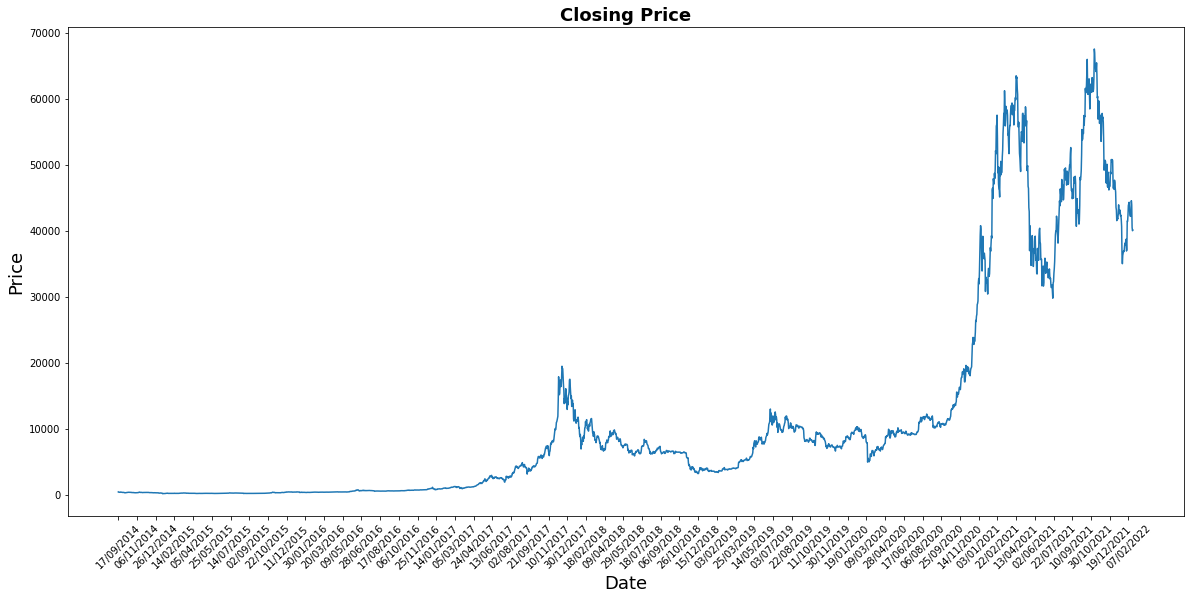

In [ ]:
price = data[['Close']] # dataframe 
# ploting the graph
plt.figure(figsize=(20,9)) # figure size 
plt.plot(price) # ploting the graph 
plt.xticks(range(0,data.shape[0],50),data['Date'].loc[::50],rotation = 45) # settig up the ticks 
plt.title('Closing Price', fontsize = 18, fontweight='bold') # setting the title of the grpah 
plt.xlabel('Date',fontsize=18) # title for the x axis 
plt.ylabel('Price', fontsize = 18) # title for the y axis 
plt.show()

In [ ]:
price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2713 entries, 0 to 2712
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   2713 non-null   float64
dtypes: float64(1)
memory usage: 21.3 KB


**Normalization **

In [ ]:
from sklearn.preprocessing import MinMaxScaler # import the libraries for normalzation 
min_max_scaler  = MinMaxScaler() # this function returns the value bertween 0 to 10 
norm_data = min_max_scaler.fit_transform(price.values) # fitting of the values (Normalazation)

In [ ]:
norm_data # values after data normalization 

array([[0.00414359],
       [0.00365546],
       [0.00321557],
       ...,
       [0.59891189],
       [0.59138785],
       [0.59280431]])

**Data Split**


In [ ]:
def univerate_data(dataset,start_index,end_index,history_size,target_size): # Function
  data1=[]
  labels=[]

  start_index = start_index + history_size # gets the starting index 
  if end_index is None: # runs the loop till end of the data set 
    end_index = len(dataset) - target_size  # gets the ending index of the data set

  for i in range(start_index, end_index):
    indices = range(i-history_size,i)
    # Reshape data from history_size, to hisoty_size 1 
    data1.append(np.reshape(dataset[indices],(history_size,1)))
    labels.append(dataset[i+target_size])
  return np.array(data1),np.array(labels)

past_history = 5 # past histoy based on 5 days of the data 
future_target = 0


TRAIN_SPLIT = int(len(norm_data)*0.8) # geting the ending index of the data of the 80% after spliting 

# calling the function 
x_train,y_train = univerate_data(norm_data, # the data set 
                                 0, # start index 
                                 TRAIN_SPLIT, # end index 
                                 past_history, # history size 
                                 future_target) # Target size 
# calling the function 
x_test,y_test = univerate_data(norm_data, # the data set 
                               TRAIN_SPLIT, # start index 
                               None, # end index 
                               past_history, # history size 
                               future_target) # target size


Building the model

In [ ]:
# importing the librarys
import keras 
from keras.models import Sequential # model import 
from tensorflow.keras.optimizers import Adam # optimizer 
from keras.layers import Dense, LSTM, LeakyReLU,Dropout # layers 

num_units = 64 # the number of nurons

learning_rate = 0.0001 
activation_funtion = 'sigmoid' # activation function 
adam = Adam(lr = learning_rate)
loss_function = 'mse' # loss function = mean squared error
batch_size = 5
num_epochs = 250 # number of epochs (trial/error)

# starting the RNN 
model = Sequential()
model.add(LSTM(units = num_units,activation=activation_funtion,input_shape=(None,1)))
model.add(LeakyReLU(alpha=0.5))
model.add(Dropout(0.1))
# this layer will now stop from overfittig 
model.add(Dense(units=1))

model.compile(optimizer=adam,loss = loss_function) # model buliding function 


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
model.summary() # summary of the model 

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 64)                16896     
                                                                 
 leaky_re_lu_6 (LeakyReLU)   (None, 64)                0         
                                                                 
 dropout_6 (Dropout)         (None, 64)                0         
                                                                 
 dense_6 (Dense)             (None, 1)                 65        
                                                                 
Total params: 16,961
Trainable params: 16,961
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#Training the model.
history = model.fit(
    x_train,
    y_train,
    validation_split = 0.1, 
    batch_size = batch_size, 
    epochs = num_epochs, 
    shuffle=False
)

Epoch 1/250
390/390 [==============================] - 2s 3ms/step - loss: 0.0246 - val_loss: 0.0016
Epoch 2/250
390/390 [==============================] - 1s 3ms/step - loss: 0.0215 - val_loss: 7.0410e-04
Epoch 3/250
390/390 [==============================] - 1s 3ms/step - loss: 0.0196 - val_loss: 5.4131e-04
Epoch 4/250
390/390 [==============================] - 1s 3ms/step - loss: 0.0167 - val_loss: 5.3750e-04
Epoch 5/250
390/390 [==============================] - 1s 3ms/step - loss: 0.0150 - val_loss: 6.5789e-04
Epoch 6/250
390/390 [==============================] - 1s 3ms/step - loss: 0.0140 - val_loss: 6.5337e-04
Epoch 7/250
390/390 [==============================] - 1s 3ms/step - loss: 0.0123 - val_loss: 5.0981e-04
Epoch 8/250
390/390 [==============================] - 1s 3ms/step - loss: 0.0114 - val_loss: 5.3952e-04
Epoch 9/250
390/390 [==============================] - 1s 3ms/step - loss: 0.0100 - val_loss: 7.1045e-04
Epoch 10/250
390/390 [==============================] - 1s 

Compareing the test and tain data through graph 


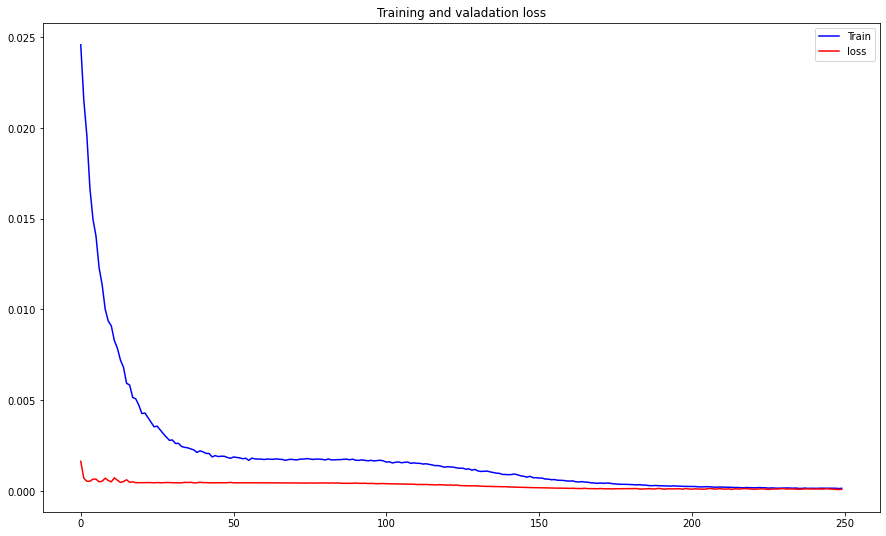

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(loss))

plt.figure(figsize = (15,9)) # setting the figure size 
plt.plot(epochs, loss,'b', label = 'Train') # Train variable
plt.plot(epochs, val_loss,'r', label = 'loss') # Loss variable 
plt.title("Training and valadation loss") # Title of the grpah
plt.legend() # legend of the graph
plt.show() 

Predection of the data

[]

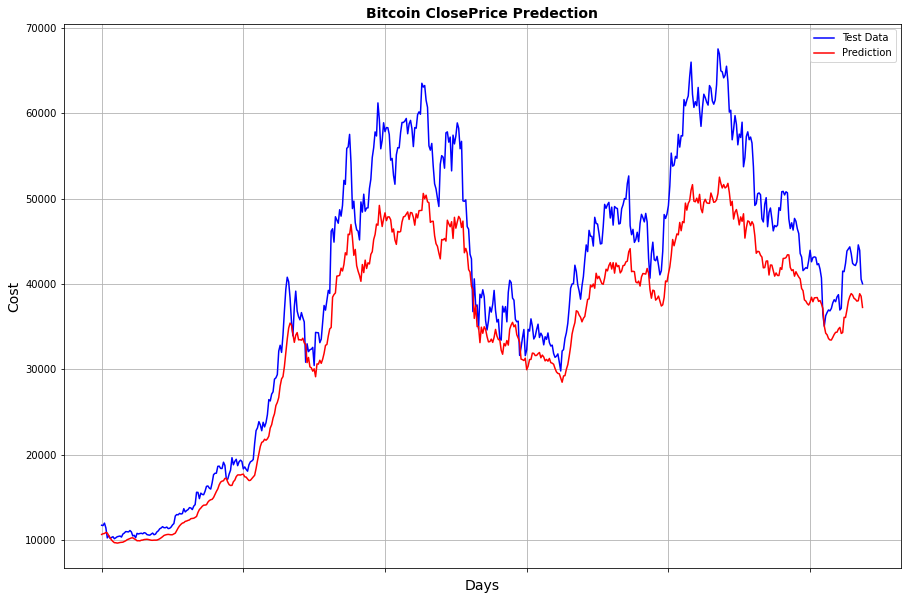

In [ ]:
original  = pd.DataFrame(min_max_scaler.inverse_transform(y_test))
predections  = pd.DataFrame(min_max_scaler.inverse_transform(model.predict(x_test)))
#sns.set(rc={'figure.figsize':(11.7+2,8.27+2)})

plt.figure(figsize=(15,10))
plt.grid(True)
ax = sns.lineplot(x = original.index,y = original[0],label = 'Test Data',color = 'blue') # Actual Price 
ax = sns.lineplot(x = predections.index, y = predections[0],label = 'Prediction',color = 'red') # Predeticed Price
ax.set_title('Bitcoin ClosePrice Predection',size = 14,fontweight = 'bold') # Title of the graph
ax.set_xlabel('Days',size = 14) # X-axis 
ax.set_ylabel('Cost',size = 14) # Y-axis 
ax.set_xticklabels('',size = 10)

In [ ]:
import numpy as np

def mape(actual, pred): 
    actual, pred = np.array(actual), np.array(pred)
    return np.mean(np.abs((actual - pred) / actual)*100)

In [ ]:
mape(loss,val_loss)

67.81260024497641

**Open**

The developer will now try to predecit the price of the colume column

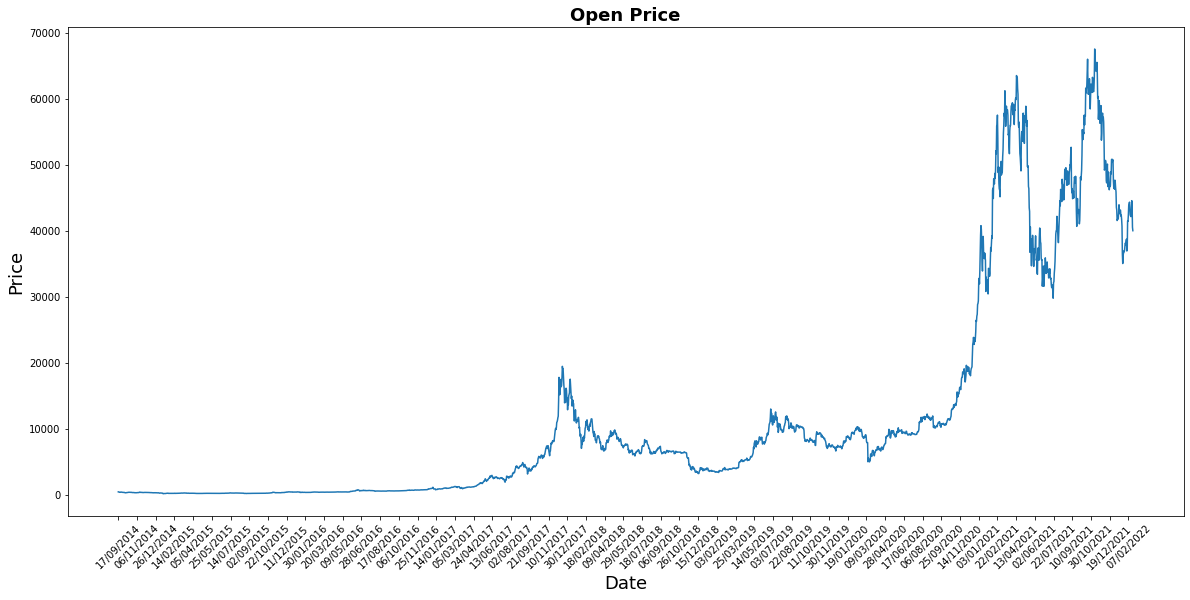

In [ ]:
price2 = data[['Open']] # dataframe 
# ploting the graph for the coloumn column
plt.figure(figsize=(20,9)) # figure size 
plt.plot(price2) # ploting the graph 
plt.xticks(range(0,data.shape[0],50),data['Date'].loc[::50],rotation = 45) # settig up the ticks 
plt.title('Open Price', fontsize = 18, fontweight='bold') # setting the title of the grpah 
plt.xlabel('Date',fontsize=18) # title for the x axis 
plt.ylabel('Price', fontsize = 18) # title for the y axis 
plt.show()

In [ ]:
price2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2713 entries, 0 to 2712
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    2713 non-null   float64
dtypes: float64(1)
memory usage: 21.3 KB


Normalazation of Volume column

In [ ]:
from sklearn.preprocessing import MinMaxScaler # import the libraries for normalzation 
min_max_scaler  = MinMaxScaler() # this function returns the value bertween 0 to 10 
norm_data2 = min_max_scaler.fit_transform(price2.values) # fitting of the values (Normalazation)

Data Split for the column Volume

In [ ]:
def univerate_data(dataset,start_index,end_index,history_size,target_size): # Function
  data1=[]
  labels=[]

  start_index = start_index + history_size # gets the starting index 
  if end_index is None: # runs the loop till end of the data set 
    end_index = len(dataset) - target_size  # gets the ending index of the data set

  for i in range(start_index, end_index):
    indices = range(i-history_size,i)
    # Reshape data from history_size, to hisoty_size 1 
    data1.append(np.reshape(dataset[indices],(history_size,1)))
    labels.append(dataset[i+target_size])
  return np.array(data1),np.array(labels)

past_history = 5 # past histoy based on 5 days of the data 
future_target = 0


TRAIN_SPLIT = int(len(norm_data2)*0.8) # geting the ending index of the data of the 80% after spliting 

# calling the function 
x_train,y_train = univerate_data(norm_data2, # the data set 
                                 0, # start index 
                                 TRAIN_SPLIT, # end index 
                                 past_history, # history size 
                                 future_target) # Target size 
# calling the function 
x_test,y_test = univerate_data(norm_data2, # the data set 
                               TRAIN_SPLIT, # start index 
                               None, # end index 
                               past_history, # history size 
                               future_target) # target size


Data Split for the Volume Column

In [ ]:
# importing the librarys
import keras 
from keras.models import Sequential # model import 
from tensorflow.keras.optimizers import Adam # optimizer 
from keras.layers import Dense, LSTM, LeakyReLU,Dropout # layers 

num_units = 64 # the number of nurons

learning_rate = 0.0001 
activation_funtion = 'sigmoid' # activation function 
adam = Adam(lr = learning_rate)
loss_function = 'mse' # loss function = mean squared error
batch_size = 5
num_epochs = 250 # number of epochs (trial/error)

# starting the RNN 
model = Sequential()
model.add(LSTM(units = num_units,activation=activation_funtion,input_shape=(None,1)))
model.add(LeakyReLU(alpha=0.5))
model.add(Dropout(0.1))
# this layer will now stop from overfittig 
model.add(Dense(units=1))

model.compile(optimizer=adam,loss = loss_function) # model buliding function 


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
#Training the model.
history = model.fit(
    x_train,
    y_train,
    validation_split = 0.1, 
    batch_size = batch_size, 
    epochs = num_epochs, 
    shuffle=False
)

Epoch 1/250
390/390 [==============================] - 2s 4ms/step - loss: 0.0275 - val_loss: 9.3765e-04
Epoch 2/250
390/390 [==============================] - 1s 3ms/step - loss: 0.0203 - val_loss: 7.1602e-04
Epoch 3/250
390/390 [==============================] - 1s 3ms/step - loss: 0.0178 - val_loss: 5.0983e-04
Epoch 4/250
390/390 [==============================] - 1s 3ms/step - loss: 0.0157 - val_loss: 6.0744e-04
Epoch 5/250
390/390 [==============================] - 1s 3ms/step - loss: 0.0142 - val_loss: 5.1735e-04
Epoch 6/250
390/390 [==============================] - 1s 3ms/step - loss: 0.0134 - val_loss: 5.7310e-04
Epoch 7/250
390/390 [==============================] - 1s 3ms/step - loss: 0.0116 - val_loss: 4.8662e-04
Epoch 8/250
390/390 [==============================] - 1s 3ms/step - loss: 0.0103 - val_loss: 5.3345e-04
Epoch 9/250
390/390 [==============================] - 1s 3ms/step - loss: 0.0097 - val_loss: 5.1955e-04
Epoch 10/250
390/390 [==============================] -

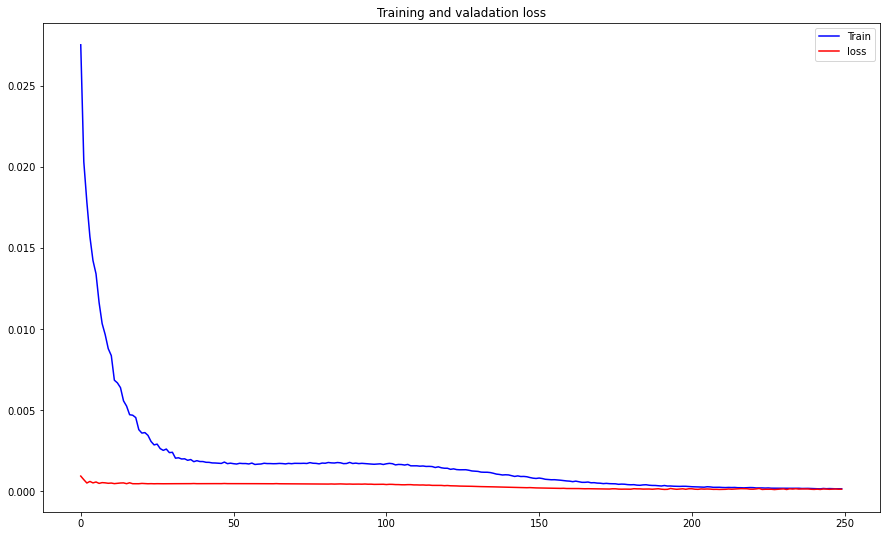

In [ ]:
loss1 = history.history['loss']
val_loss1 = history.history['val_loss']

epochs = range(len(loss))

plt.figure(figsize = (15,9)) # setting the figure size 
plt.plot(epochs, loss,'b', label = 'Train') # Train variable
plt.plot(epochs, val_loss,'r', label = 'loss') # Loss variable 
plt.title("Training and valadation loss") # Title of the grpah
plt.legend() # legend of the graph
plt.show()

[]

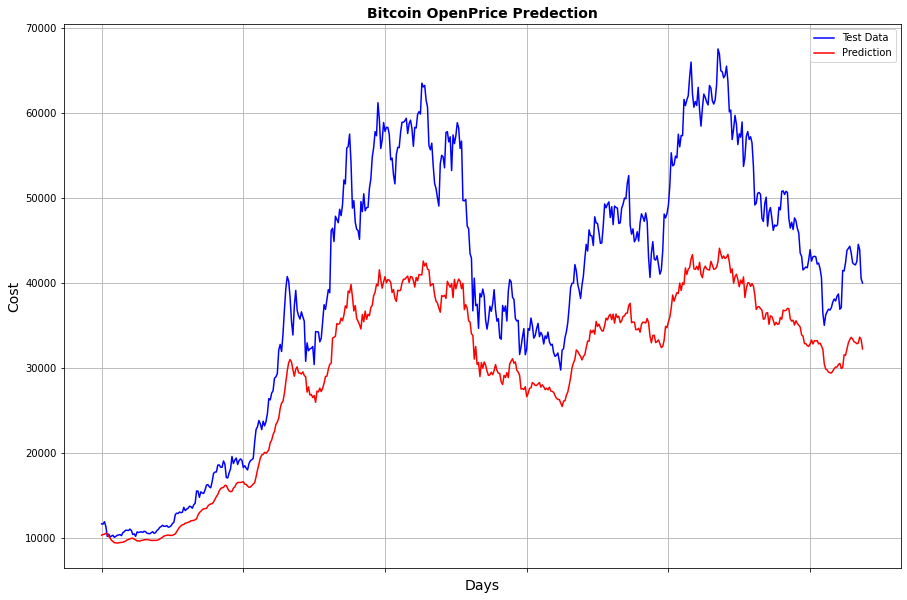

In [ ]:
original  = pd.DataFrame(min_max_scaler.inverse_transform(y_test))
predections  = pd.DataFrame(min_max_scaler.inverse_transform(model.predict(x_test)))
#sns.set(rc={'figure.figsize':(11.7+2,8.27+2)})
plt.figure(figsize=(15,10))
plt.grid(True)
ax = sns.lineplot(x = original.index,y = original[0],label = 'Test Data',color = 'blue') # Actual Price 
ax = sns.lineplot(x = predections.index, y = predections[0],label = 'Prediction',color = 'red') # Predeticed Price
ax.set_title('Bitcoin OpenPrice Predection',size = 14,fontweight = 'bold') # Title of the graph
ax.set_xlabel('Days',size = 14) # X-axis 
ax.set_ylabel('Cost',size = 14) # Y-axis 
ax.set_xticklabels('',size = 10)

In [ ]:
import numpy as np
def mape(actual, pred): 
    actual, pred = np.array(actual), np.array(pred)
    return np.mean(np.abs((actual - pred) / actual)*100)

In [ ]:
mape(loss1,val_loss1)

66.49047941478935

# **ARIMA Model**

In [ ]:
# ARIMA Model 
from statsmodels.tsa.arima_model import ARIMA 
# mean squared error and mean absolute error libraries 
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [ ]:
dateparse = lambda dates: pd.datetime.strptime(dates,'%d/%m/%Y') # date phaease 
data2 = pd.read_csv('/content/BTC-USD.csv',index_col = 'Date',parse_dates = ['Date'],date_parser = dateparse)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  """Entry point for launching an IPython kernel.


**Close Price **

In [ ]:
# train test split 
train = int(len(data2)*0.9) # Split the data 
train_data = list(data2[0:train]['Close']) # 90% of the data 
test_data = list(data2[train:]['Close']) # 10% of the data

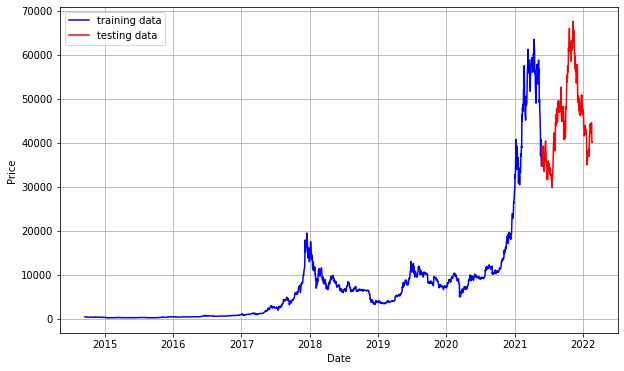

In [ ]:
# Visualizing the testing the training data
plt.figure(figsize=(10,6)) # figure size 
plt.grid(True) # enabling the grid 
plt.xlabel('Date') # title for the x axis 
plt.ylabel("Price") # title for the y axis 
plt.plot(data2[0:train]['Close'],'blue', label = 'training data') # ploting the training data 
plt.plot(data2[train:]['Close'],'red',label = "testing data") # ploting the testing data 
plt.legend() # showing the legend 

In [ ]:
model_predictions = [] # Creating an empty list 
n_test_obser = len(test_data) # saving the lenght of the test data 

In [ ]:
for i in range(n_test_obser): # loop for the building the model 
  model = ARIMA(train_data, order =(4,1,0))  # ARIMA Model 
  modelfit = model.fit() # model Fitting 
  result = modelfit.forecast() # model Forecasting
  yhat = list(result[0])[0]
  model_predictions.append(yhat) # saving the test data after running the model
  actual_test_data = test_data[i] # saving the test data 
  train_data.append(actual_test_data) # Apending the data  

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


In [ ]:
len(test_data)

272

In [ ]:
print(modelfit.summary())

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                 2711
Model:                 ARIMA(4, 1, 0)   Log Likelihood              -21873.605
Method:                       css-mle   S.D. of innovations            772.416
Date:                Sun, 18 Sep 2022   AIC                          43759.209
Time:                        06:54:05   BIC                          43794.640
Sample:                             1   HQIC                         43772.019
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         14.5974     15.305      0.954      0.340     -15.400      44.595
ar.L1.D.y     -0.0223      0.019     -1.165      0.244      -0.060       0.015
ar.L2.D.y     -0.0027      0.019     -0.139      0.8

Text(0.5, 1.0, 'Bitcoin Price')

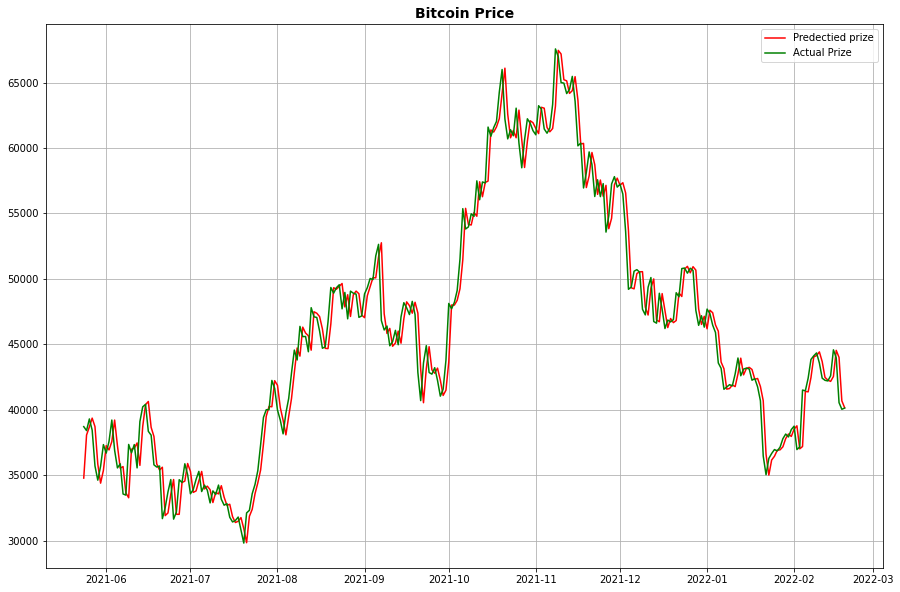

In [ ]:
# Printing the grpah 
plt.figure(figsize=(15,10)) # figure size 
plt.grid(True) # enabling the grid 
date_range = data2[train:].index # seting the range 
plt.plot(date_range,model_predictions,color = 'red',label = 'Predectied prize') # ploting the predecting price 
plt.plot(date_range,test_data,color = 'green',label = 'Actual Prize') # ploting the actual price 
plt.legend() # enabling the legend 
plt.title('Bitcoin Price',size = 14,fontweight = 'bold') # Title of the graph

In [ ]:
# model performance 
mape = np.mean(np.abs(np.array(model_predictions) - np.array(test_data))/np.abs(test_data)*100)
print("MAPE = "+str(mape))

MAPE = 2.7490943229980878


**Open Price **

In [ ]:
# train test split 
train = int(len(data2)*0.9) # Split the data 
train_data = list(data2[0:train]['Open']) # 90% of the data 
test_data = list(data2[train:]['Open']) # 10% of the data

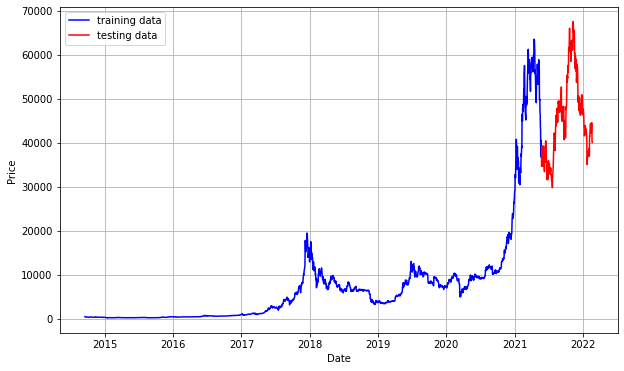

In [ ]:
# Visualizing the testing the training data
plt.figure(figsize=(10,6)) # figure size 
plt.grid(True) # enabling the grid 
plt.xlabel('Date') # title for the x axis 
plt.ylabel("Price") # title for the y axis 
plt.plot(data2[0:train]['Open'],'blue', label = 'training data') # ploting the training data 
plt.plot(data2[train:]['Open'],'red',label = "testing data") # ploting the testing data 
plt.legend() # showing the legend 

In [ ]:
model_predictions1 = [] # Creating an empty list 
n_test_obser1 = len(test_data) # saving the lenght of the test data 

In [ ]:
for i in range(n_test_obser1): # loop for the building the model 
  model = ARIMA(train_data, order =(4,1,0))  # ARIMA Model 
  modelfit = model.fit() # model Fitting 
  result = modelfit.forecast() # model Forecasting
  yhat = list(result[0])[0]
  model_predictions1.append(yhat) # saving the test data after running the model
  actual_test_data = test_data[i] # saving the test data 
  train_data.append(actual_test_data) # Apending the data  

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


In [ ]:
print(modelfit.summary())

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                 2799
Model:                 ARIMA(4, 1, 0)   Log Likelihood              -22787.323
Method:                       css-mle   S.D. of innovations            830.723
Date:                Sun, 18 Sep 2022   AIC                          45586.647
Time:                        06:57:33   BIC                          45622.269
Sample:                             1   HQIC                         45599.505
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         14.3216     15.735      0.910      0.363     -16.518      45.162
ar.L1.D.y     -0.0500      0.019     -2.642      0.008      -0.087      -0.013
ar.L2.D.y     -0.0006      0.019     -0.034      0.9

Text(0.5, 1.0, 'Bitcoin Price')

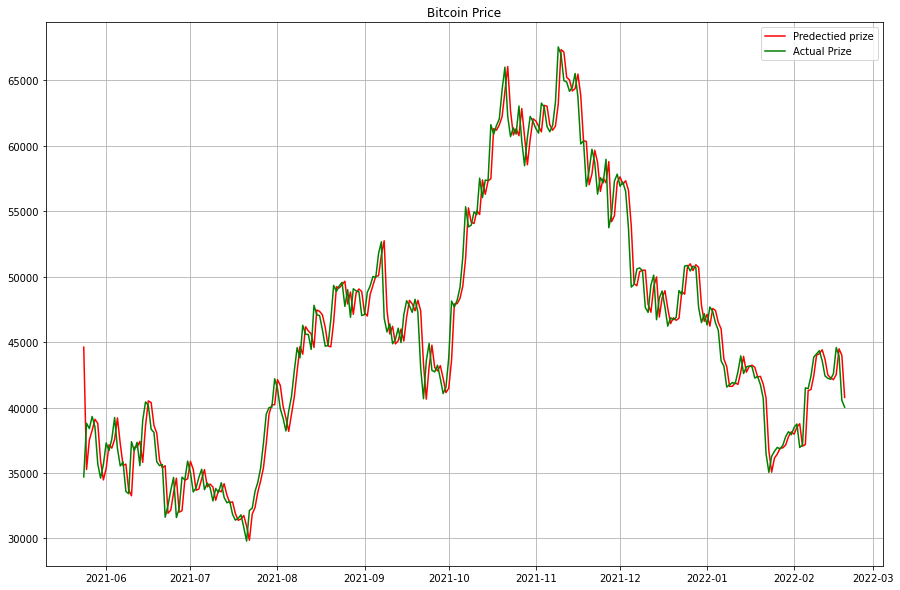

In [ ]:
# Printing the grpah 
plt.figure(figsize=(15,10)) # figure size 
plt.grid(True) # enabling the grid 
date_range = data2[train:].index # seting the range 
plt.plot(date_range,model_predictions1,color = 'red',label = 'Predectied prize') # ploting the predecting price 
plt.plot(date_range,test_data,color = 'green',label = 'Actual Prize') # ploting the actual price 
plt.legend() # enabling the legend 
plt.title("Bitcoin Price")

In [ ]:
# model performance 
mape = np.mean(np.abs(np.array(model_predictions1) - np.array(test_data))/np.abs(test_data)*100)
print("MAPE = "+str(mape))

MAPE = 2.8740277094262674
